## A Sophisticated Delicacy for the Aesthetes

The World Museum of Cakes is hosting its grand opening and they are having a competition for the best cake. In your quest to obtain the **Golden Food Truck** you decide to enter the competition!

For your masterpiece, you will go with a classic: a multi-layer cake (see image). Create a *recursive function* that builds such a cake for any number of layers N. Then show an image of a 5-layer cake. At the top there should be a circular cherry.

Notes:
*   The base of the first layer must be 2/3 of N+1.
*   Each subsequent layer's base is 2/3ds the layer below it.
*   The height of each layer is 1.
*   All layers must be centered at 0.
*   Each layer must change color according to the Pastel1 color map in matplotlib.
*   To help you with the plotting part, we have provided some code snippets, you can use it or write your own.
*   The documentation for matplotlib's patches is [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Circle.html) for the circle, and [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html) for the rectangle.



In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle

In [ ]:
def make_cake(N_layers, height, parent_base, ax, cmap):
  base = 2/3 * parent_base
  if N_layers <= 0:
    draw_circle(height, ax)
  else:
    draw_rectangle(base, height, ax, cmap)
    make_cake(N_layers - 1, height + 1, base, ax, cmap)
  return

def draw_rectangle(b, h, ax, cmap):
  layer = Rectangle((-b/2, h), width = b, height = 1, facecolor = cmap(h))
  ax.add_patch(layer)
  return ;

def draw_circle(h,ax):
  cherry = Circle((0, h), .1, facecolor = "firebrick")
  ax.add_patch(cherry)
  return ;



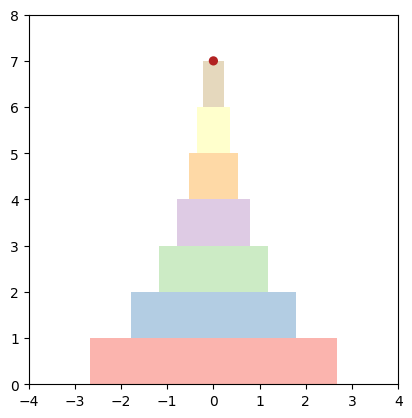

In [ ]:
N = 7

cmap = plt.get_cmap("Pastel1")

fig, ax = plt.subplots(1,1)
ax.set_xlim(left = -(N+1)/2, right = (N+1)/2)
ax.set_ylim(bottom = 0, top = N + 1)
ax.set_aspect('equal', adjustable='box')

#
make_cake(N, 0, N+1, ax, cmap)

# PART 2

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
chef_connections = [(1,2), (1,3), (1,4), (2,5), (3,6), (4,7), (4,8), (7,9), (7,10), (8,11)]
G = nx.Graph(chef_connections)


In [ ]:
list(G.edges)

In [ ]:
chef_c = {1: (2,3,4), 2:(1,5), 3:(1,6), 4: (1,7,8), 7: (4,9,10), 8:(4,11)}
H = nx.Graph(chef_c)
list(H.nodes)

[1, 2, 3, 4, 7, 8, 5, 6, 9, 10, 11]

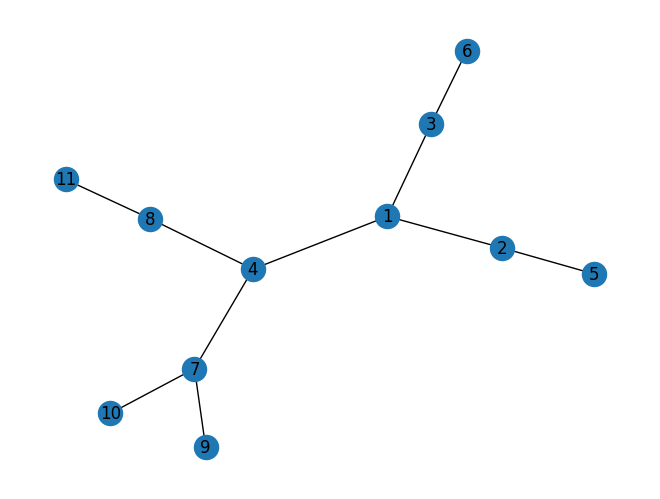

In [ ]:
nx.draw(H, with_labels = True)

In [ ]:
test = list(H.neighbors(1))
visited = [5]

if set(visited).issubset(set(test)):
  print("success")

In [ ]:
def write_test(g, n, visited):
  neighs = list(g.neighbors(n))
  new = list(set(neighs).difference(visited))
  if not new:
    print(n, '--')
    visited.append(n)
    return visited;
  else:
    print(n)
    visited.append(n)
    for j in new:
      visited = write_test(g,j,visited)
    return visited;

In [ ]:
def make_multi_cake(g, n, own_index, visited, height, parent_base, parent_coord, N_sibs, ax, cmap):
  global coord_hist

  neighs = list(g.neighbors(n))
  new_nodes = list(set(neighs).difference(visited))

  base_coord = determine_base_coordinate(own_index, N_sibs, parent_base)
  base_coord = base_coord + (parent_coord + parent_base/2)
  base_size = (2/3)*parent_base / N_sibs
  coord_hist.append((n, base_coord))

  if not new_nodes:
    base_circ = base_coord + base_size/2
    draw_rectangle_multi(base_coord, base_size, height, ax, cmap)
    draw_circle_multi(base_circ, height+1, ax)
    visited.append(n)
    return (visited)
  else:
    draw_rectangle_multi(base_coord, base_size, height, ax, cmap)
    visited.append(n)
    for sibling_index, j in enumerate(new_nodes):
      visited = make_multi_cake(g, j, sibling_index, visited, height + 1, base_size, base_coord, len(new_nodes), ax, cmap)
    return visited;

def determine_base_coordinate(own_index, N, parent_base):
  global cent_ind
  if N%2 == 0:
    centered_index = own_index - (N/2 - 1)
    rec_coordinates = (centered_index - 5/6)*parent_base/N
  else:
    centered_index = own_index - (N-1)/2
    rec_coordinates =  (centered_index - 1/3) * parent_base/N

  cent_ind.append(centered_index)
  return rec_coordinates;

def draw_rectangle_multi(b, bw, h, ax, cmap):
  layer = Rectangle((b, h), width = bw, height = 1, facecolor = cmap(h))
  ax.add_patch(layer)
  return ;

def draw_circle_multi(b, h,ax):
  cherry = Circle((b, h), .1, facecolor = "firebrick")
  ax.add_patch(cherry)
  return ;


[1, 2, 5, 3, 6, 4, 8, 11, 7, 9, 10]

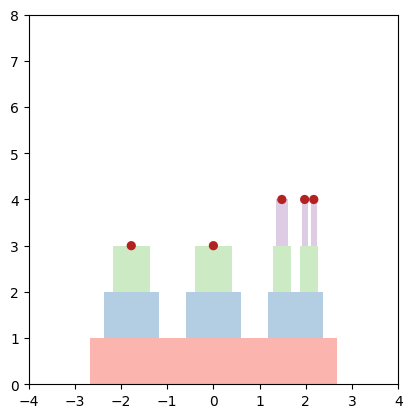

In [ ]:
cmap = plt.get_cmap("Pastel1")

N = 7

fig, ax = plt.subplots(1,1)
ax.set_xlim(left = -(N+1)/2, right = (N+1)/2)
ax.set_ylim(bottom = 0, top = N + 1)
ax.set_aspect('equal', adjustable='box')

#
global coord_hist, cent_ind
coord_hist = []
cent_ind = []
make_multi_cake(H, 1, 0, [], 0, N+1, -4, 1, ax, cmap)

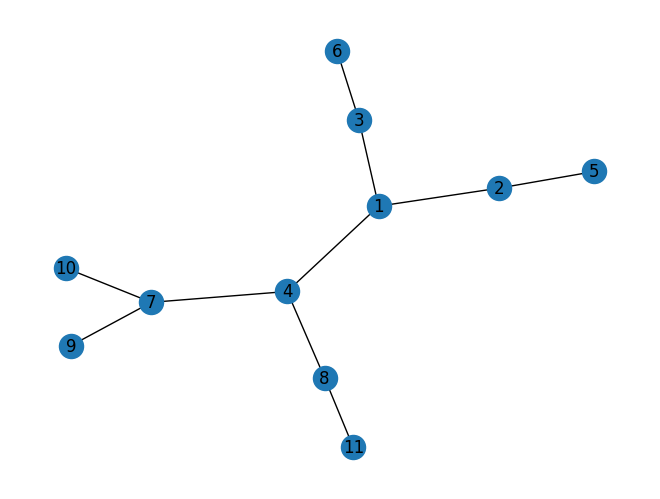

In [ ]:
nx.draw(H, with_labels = True)

In [ ]:
coord_hist

[(1, -2.6666666666666665),
 (2, -2.3703703703703702),
 (5, -2.1728395061728394),
 (3, -0.5925925925925926),
 (6, -0.3950617283950617),
 (4, 1.1851851851851853),
 (8, 1.2839506172839508),
 (11, 1.3497942386831276),
 (7, 1.8765432098765433),
 (9, 1.909465020576132),
 (10, 2.1069958847736627)]